In [1]:
import pybamm
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
models = [
    pybamm.lithium_sulfur.MarinescuEtAl2016(name="Original parameters"),
    pybamm.lithium_sulfur.MarinescuEtAl2016(name="Updated parameters"),
]

# Update current 
params = [models[0].default_parameter_values, models[0].default_parameter_values]
params[0].update({"Current function [A]": 1.7})
params[1].update({"Current function [A]": 1.7})

# Update current and ICs for second model to correspond to initial 2.4V as in ref [2]
params[1].update({    
    "Initial Condition for S8 ion [g]": 2.6730,
    "Initial Condition for S4 ion [g]": 0.0128,
    "Initial Condition for S2 ion [g]": 4.3321e-6,
    "Initial Condition for S ion [g]": 1.6321e-6,
    "Initial Condition for Precipitated Sulfur [g]": 2.7e-06,
    "Initial Condition for Terminal Voltage [V]": 2.4,
    "Shuttle rate coefficient during charge [s-1]": 0.0002,
    #"Shuttle rate coefficient during discharge [s-1]": 1e-10,    
    "Shuttle rate coefficient during discharge [s-1]": 0.0002,  
})

# Set up and solve simulations
sims = []
for i, model in enumerate(models):
    sim = pybamm.Simulation(
        model, 
        parameter_values=params[i], 
        solver=pybamm.ScikitsDaeSolver(atol=1e-6,rtol=1e-6,root_method="lm",root_tol=1e-6)
    )
    sim.solve(np.linspace(0, 6750, 6750))
    sims.append(sim)

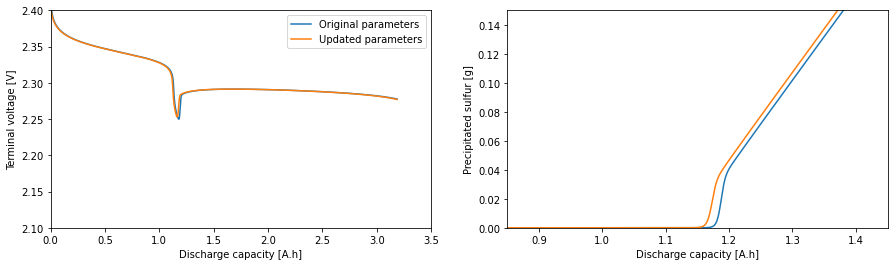

In [3]:
# set up figure 
fig, ax = plt.subplots(1, 2, figsize=(15,4))
ax[0].set_xlim([0, 3.5])
ax[0].set_ylim([2.1, 2.4])
ax[0].set_xlabel("Discharge capacity [A.h]")
ax[0].set_ylabel("Terminal voltage [V]")
ax[1].set_xlim([0.85, 1.45])
ax[1].set_ylim([0, 0.15])
ax[1].set_xlabel("Discharge capacity [A.h]")
ax[1].set_ylabel("Precipitated sulfur [g]")

# extract variables and plot
for sim in sims:
    DC = sim.solution["Discharge capacity [A.h]"].entries
    V = sim.solution["Terminal voltage [V]"].entries
    S = sim.solution["Precipitated Sulfur [g]"].entries
    ax[0].plot(DC, V)  
    ax[1].plot(DC, S);  

ax[0].legend(["Original parameters", "Updated parameters"])

In [6]:
pybamm.dynamic_plot(
    sims[1], 
    [
     ["S8 [g]", 
     "S4 [g]", 
     "S2 [g]", 
     "S [g]", 
     "Precipitated Sulfur [g]"],
     ["High plateau current [A]", 
     "Low plateau current [A]"], 
     ["High plateau over-potential [V]", 
     "Low plateau over-potential [V]"],         
     ["High plateau potential [V]",
     "Low plateau potential [V]",
     "Terminal voltage [V]"],
    ], 
    time_unit="seconds")

interactive(children=(FloatSlider(value=0.0, description='t', max=6750.0, step=67.5), Output()), _dom_classes=…